In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Classification with Random Labels 

This notebook provides a demo to produce the learning curve of linear classifier with random labels. In particular, the notebook is structured in the following three parts:

1. **Learning curves with real datasets.** This part guides the reader to reproduce the learning curves relative to real pre-processed datasets;
2. **Learning curves with single Gaussian synthetic datasets.** This part guides the reader to reproduce the learning curves relative to datatset sampled from a single Gaussian distribution;
3. **Learning curves with Gaussian mixture synthetic datasets.** This part guides the reader to reproduce the learning curves relative to datatset sampled from a Gaussian mixture distribution.

## Learning Curves with Real Datasets

This section provides the guidelines to generate the learning curves relative to real pre-processed datasets.

In [2]:
from Simulations.get_preprocessed_real_datasets import get_real_data
from Simulations.get_covariances import build_covariances_real
from Theory.single_gaussian import get_single_gaussian_learning_curve

### Estimation of the mean and of the covariance matrix

As a first step, we need to compute the empirical covariance of the chosen real dataset. The dataset can be chosen through the string ***which_real_dataset***, which can be set to *MNIST*, *fashion-MNIST* and *CIFAR10*. The pre-prosessing type can be selected through the string ***which_transform***, which can be set to *random_gaussian_features* or *wavelet_scattering*. In case of random Gaussian features, the type of non-linearity can be set through the string ***which_non_lin***, the current availbale implementations are *erf*, *tanh* and *relu*. The method ***get_real_data*** takes as input all this information on the dataset and applies the corresponding pre-processing. The pre-processed input data points are then stored in an hdf5 file format. Note that this step is done once for all. Given the input data-points, the method ***build_covariances_real*** computes the corresponding mean *$\vec{μ}_{real}$* and covariance matrix *$Σ_{real}$*. Note that for standardized dataset, the mean is always zero. 

In [3]:
p = 2000
which_real_dataset = "MNIST"
which_transform = "random_gaussian_features"
which_non_lin = "erf"
path_to_data_folder = "./data"
get_real_data(p, which_real_dataset = which_real_dataset, which_transform = which_transform, 
                  which_non_lin = which_non_lin, path_to_data_folder = path_to_data_folder)
μ_real, Σ_real = build_covariances_real(p = p, which_real_dataset = which_real_dataset, 
                  which_transform = which_transform, which_non_lin = which_non_lin, 
                  path_to_data_folder = path_to_data_folder)    

Keys: <KeysViewHDF5 ['X_MNIST_random_gaussian_features_erf']>


Given the mean and the covariance of the input data distribution, we can then pass them to the method ***get_single_gaussian_learning_curve***, which implements the saddle-point equations for the chosen classification problem. This method then writes the analytical value of the training loss at the corresponding ratio of the number of samples per input dimensions in a csv file format. The vailable loss type are *square_loss*, *hinge_loss* and *logistic_loss*. The parameter *λ* defines the regularization strength, while *max_iters*, *ϵ*, *ψ* are the maximum number of iterations required to solve the saddle-point equations, the covergence tolerance and the dumping.

In [4]:
loss = "hinge_loss"
path_to_res_folder = "./results"
resfile = "res_%s_real.csv"%(loss)
αs = np.arange(0.01, 4., 0.1)
max_iters = 1000
ϵ = 1e-7
ψ = 0.0
λ = 0.1
mean_identifier = "zero_mean"
cov_identifier = which_real_dataset + "_" + which_transform + "_" + which_non_lin

get_single_gaussian_learning_curve(Σ_real, mean_identifier, cov_identifier, αs=αs, λ=λ, loss = loss, 
                                   path_to_res_folder = path_to_res_folder,
                                   resfile = resfile, max_iters = max_iters, ϵ = ϵ, ψ=ψ)

computing its eigenvalues...
-----------------------> processing n/p =  0.01
it =  0 Δ =  45.345361801581134
it =  1 Δ =  0.7793869576329845
it =  2 Δ =  0.10871071875713911
it =  3 Δ =  0.015330505318999904
it =  4 Δ =  0.001727610551652159
it =  5 Δ =  0.00026666070155415
it =  6 Δ =  6.851457514576997e-05
it =  7 Δ =  1.3431964968765864e-05
it =  8 Δ =  2.2026927978119337e-06
it =  9 Δ =  3.250420703010404e-07
it =  10 Δ =  5.235442884776731e-08
-----------------------> processing n/p =  0.11
it =  0 Δ =  1.44961796609756
it =  1 Δ =  0.2997813290579209
it =  2 Δ =  0.07672018827817034
it =  3 Δ =  0.01758520703614669
it =  4 Δ =  0.006399848562094329
it =  5 Δ =  0.0030489231100518377
it =  6 Δ =  0.0011299054315922763
it =  7 Δ =  0.0003481212877729234
it =  8 Δ =  8.744976364577495e-05
it =  9 Δ =  2.8185520729584468e-05
it =  10 Δ =  7.520298008989457e-06
it =  11 Δ =  1.641035733856988e-06
it =  12 Δ =  9.565518587495436e-07
it =  13 Δ =  3.924297131696619e-07
it =  14 Δ =  1.3

it =  11 Δ =  1.1538477329153807e-07
it =  12 Δ =  2.932579046266426e-08
-----------------------> processing n/p =  2.51
it =  0 Δ =  0.028872057641347704
it =  1 Δ =  0.005451629161704885
it =  2 Δ =  0.004019379170753901
it =  3 Δ =  0.001404142043170853
it =  4 Δ =  0.00016302886532870708
it =  5 Δ =  7.800529448381832e-05
it =  6 Δ =  4.9088700008137476e-05
it =  7 Δ =  1.2199883043517712e-05
it =  8 Δ =  1.6596162900617273e-06
it =  9 Δ =  1.2803449408460565e-06
it =  10 Δ =  5.243654405684417e-07
it =  11 Δ =  8.403258572320382e-08
-----------------------> processing n/p =  2.61
it =  0 Δ =  0.027717544654229154
it =  1 Δ =  0.0050564037045744414
it =  2 Δ =  0.003709747862466528
it =  3 Δ =  0.0012689737653930888
it =  4 Δ =  0.00013898179788562892
it =  5 Δ =  7.133374987428054e-05
it =  6 Δ =  4.275076937065858e-05
it =  7 Δ =  1.0093390981014139e-05
it =  8 Δ =  1.4499863869033014e-06
it =  9 Δ =  1.1020505264469627e-06
it =  10 Δ =  4.2285062201719015e-07
it =  11 Δ =  6.001

In [5]:
from Simulations.train import get_learning_curve_real
from Simulations.statistics import statistics_learning_curve_real

Having the theoretical prediction of the learning curve, we can then corroborate this result through numerical simulations with the method ***get_learning_curve_real***. This method then writes the numerical value of the training loss at the corresponding ratio of the number of samples per input dimensions in a csv file format, one for each seed. Note that the *solver* parameter needs to be specified only in case the chosen loss is the hinge loss, otherwise it can be set to *None*. The current availbale implementations are *sk* and *cvxpy*. The first is faster but struggles to converge for vanishing regularizations, the second is slower but it converges at zero regularization strenghts. 

In [6]:
n_seeds = 10
solver = 'sk'
αs = np.linspace(0.05,3.5, 10)
for seed in range(n_seeds):
    print("processing seed n. ", seed)
    get_learning_curve_real(αs = αs, λ = λ, loss = loss, which_real_dataset = which_real_dataset, 
                    which_transform = which_transform, which_non_lin = which_non_lin,
                    path_to_data_folder = path_to_data_folder, path_to_res_folder = path_to_res_folder, 
                    solver = solver, seed = seed)

processing seed n.  0
Keys: <KeysViewHDF5 ['X_MNIST_random_gaussian_features_erf']>
-----------------------> processing n/p =  0.05
-----------------------> processing n/p =  0.43333333333333335
-----------------------> processing n/p =  0.8166666666666668
-----------------------> processing n/p =  1.2000000000000002
-----------------------> processing n/p =  1.5833333333333335
-----------------------> processing n/p =  1.9666666666666668
-----------------------> processing n/p =  2.35
-----------------------> processing n/p =  2.7333333333333334
-----------------------> processing n/p =  3.1166666666666667
-----------------------> processing n/p =  3.5
processing seed n.  1
Keys: <KeysViewHDF5 ['X_MNIST_random_gaussian_features_erf']>
-----------------------> processing n/p =  0.05
-----------------------> processing n/p =  0.43333333333333335
-----------------------> processing n/p =  0.8166666666666668
-----------------------> processing n/p =  1.2000000000000002
-------------------

The last step requires to average the simulation outcomes over the different seeds through the method ***statistics_learning_curve_real*** and then to plot the theoretical prediction together with the corresponding numerical simulations. 

In [7]:
statistics_learning_curve_real(n_seeds = n_seeds, loss = loss, path_to_res_folder = path_to_res_folder)

Text(0.5, 0, 'n/p')

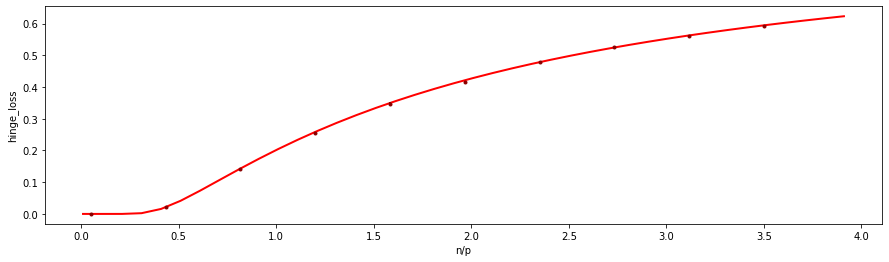

In [8]:
theo = pd.read_csv(path_to_res_folder +'/res_%s_real.csv'%(loss), delimiter = ',')
sim = pd.read_csv(path_to_res_folder +'/sim_%s_real.csv'%(loss), delimiter = ',')
fig, ax = plt.subplots(1, figsize=(15,4), sharex = True, sharey=False)

theo[(theo["cov_identifier"] == cov_identifier) & (theo["lamb"] == λ)].plot(x='alpha',
         y='train_loss',
         color = 'red',
         lw = 2,
         linestyle='-',
         ax=ax,
         label='theory')

sim[(sim["which_real_dataset"] == which_real_dataset) & (sim["lamb"] == λ)].plot(x='alpha',
        y='mean_train_loss',
        yerr = 'std_train_loss',        
        color = 'darkred',
        marker = 'o',
        markersize = 3,                                                                         
        lw = 2,
        linestyle='None',
        ax=ax,
        label='simulation')

ax.set_ylabel(r"%s"%(loss))
ax.get_legend().remove()
ax.set_xlabel(r"n/p")

## Learning Curves with Single Gaussian

This section provides the guidelines to generate the learning curves relative to input data-points, drawn from a Gaussian distribution as:

$$\vec{x}_i \sim \mathcal{N}\left(\vec{\mu}, \Sigma \right)$$

with $\vec{\mu}$ being the mean and $\Sigma$ the covariance matrix respectively. As for the case of real datasets, the first step consists in selecting the mean and the covariance matrix of the Gaussian distribution. We use the method ***build-covariances_synthetic_single_gaussian*** for that. The type of mean and covariance matrix can be chosen through the strings *which_mean* and *which_cov*. The available implementations are *zero_mean* for the mean and *iid_Gaussian* and *diagonal_three_blocks_sg* for the covariance matrix.

In [9]:
from Simulations.get_covariances import build_covariances_synthetic_single_gaussian

In [10]:
p = 1000
which_cov = "iid_Gaussian"
which_mean = "zero_mean"
ρ_p = 0.0
ρ_m = 0.0

μ, Σ = build_covariances_synthetic_single_gaussian(p = p, which_cov = which_cov, 
                  which_mean = which_mean, ρ_p = ρ_p, ρ_m = ρ_m)

Having determined the mean and the covariance matrix of the Gaussian distribution, we can then run the saddle-point equations to get the theoretical predictions on the training loss as a function of the number of samples per input dimension. The method and the corresponding parameters are the same of those encountered in the real dataset part.

In [11]:
loss = "hinge_loss"
path_to_res_folder = "./results"
resfile = "res_%s_single_gaussian.csv"%(loss)
αs = np.arange(0.01, 4., 0.1)
max_iters = 1000
ϵ = 1e-7
ψ = 0.0
λ = 0.1
mean_identifier = which_mean
cov_identifier = which_cov

get_single_gaussian_learning_curve(Σ, mean_identifier, cov_identifier, αs=αs, λ=λ, loss = loss, 
                                   path_to_res_folder = path_to_res_folder,
                                   resfile = resfile, max_iters = max_iters, ϵ = ϵ, ψ=ψ)

computing its eigenvalues...
-----------------------> processing n/p =  0.01
it =  0 Δ =  45.10487190886315
it =  1 Δ =  0.04947338322133424
it =  2 Δ =  0.0005787491774034235
it =  3 Δ =  6.680037514881186e-06
it =  4 Δ =  7.57326110364942e-08
it =  5 Δ =  8.466488387107174e-10
it =  6 Δ =  9.360462925600554e-12
-----------------------> processing n/p =  0.11
it =  0 Δ =  0.49086317722690925
it =  1 Δ =  0.05727933891789828
it =  2 Δ =  0.006669754086798374
it =  3 Δ =  0.0006575453166094286
it =  4 Δ =  5.01937989994955e-05
it =  5 Δ =  9.353681796345215e-06
it =  6 Δ =  1.3815470041311784e-06
it =  7 Δ =  1.731817210748332e-07
it =  8 Δ =  1.8733423257089044e-08
-----------------------> processing n/p =  0.21000000000000002
it =  0 Δ =  0.43958053940168856
it =  1 Δ =  0.09139899278158613
it =  2 Δ =  0.014639572554111052
it =  3 Δ =  0.004203785888254596
it =  4 Δ =  0.0016629833980741915
it =  5 Δ =  0.0004427076928782969
it =  6 Δ =  0.00011033081439898451
it =  7 Δ =  2.26461100

it =  1 Δ =  0.01448641444204568
it =  2 Δ =  0.0017316228438603032
it =  3 Δ =  0.0015935267507826145
it =  4 Δ =  0.0013628642247712763
it =  5 Δ =  0.000746984578966492
it =  6 Δ =  0.0003285037733387064
it =  7 Δ =  0.00012006886774751369
it =  8 Δ =  3.471306319857703e-05
it =  9 Δ =  5.885584211884343e-06
it =  10 Δ =  2.082720857776721e-06
it =  11 Δ =  1.9943062352645313e-06
it =  12 Δ =  1.2514112118777732e-06
it =  13 Δ =  5.982512177871158e-07
it =  14 Δ =  2.367100417899337e-07
it =  15 Δ =  7.660552581167934e-08
-----------------------> processing n/p =  2.81
it =  0 Δ =  0.05492166072375437
it =  1 Δ =  0.01351955213736622
it =  2 Δ =  0.0014689468961988084
it =  3 Δ =  0.0013654266966217632
it =  4 Δ =  0.0011632921233839522
it =  5 Δ =  0.0006272869831311922
it =  6 Δ =  0.0002704969706313065
it =  7 Δ =  9.67096103758891e-05
it =  8 Δ =  2.724031317269393e-05
it =  9 Δ =  4.415714925154468e-06
it =  10 Δ =  1.5889992245332607e-06
it =  11 Δ =  1.5137716342650265e-06
it

Once we get the theoretical predictions, the method ***get_learning_curve_synthetic*** evaluates the training loss as a function of the number of samples per input dimension. The results are collected in a csv file, one for each seed.

In [12]:
from Simulations.train import get_learning_curve_synthetic
from Simulations.statistics import statistics_learning_curve_synthetic

In [13]:
n_seeds = 10
solver = 'sk'
which_synthetic_dataset = "single_gaussian"
αs = np.linspace(0.05,3.5, 10)
for seed in range(n_seeds):
    print("processing seed n. ", seed)
    get_learning_curve_synthetic(p, μ, Σ, None, None, None, None, αs = αs, λ = λ, loss = loss, 
                                 which_synthetic_dataset = which_synthetic_dataset,
                                 mean_identifier = mean_identifier, cov_identifier = cov_identifier,
                                 path_to_res_folder = path_to_res_folder, solver = solver, seed = seed)

processing seed n.  0
-----------------------> processing n/p =  0.05
-----------------------> processing n/p =  0.43333333333333335
-----------------------> processing n/p =  0.8166666666666668
-----------------------> processing n/p =  1.2000000000000002
-----------------------> processing n/p =  1.5833333333333335
-----------------------> processing n/p =  1.9666666666666668
-----------------------> processing n/p =  2.35
-----------------------> processing n/p =  2.7333333333333334
-----------------------> processing n/p =  3.1166666666666667
-----------------------> processing n/p =  3.5
processing seed n.  1
-----------------------> processing n/p =  0.05
-----------------------> processing n/p =  0.43333333333333335
-----------------------> processing n/p =  0.8166666666666668
-----------------------> processing n/p =  1.2000000000000002
-----------------------> processing n/p =  1.5833333333333335
-----------------------> processing n/p =  1.9666666666666668
-------------------

As a last step, we average the simulations over the specified number of seeds and we then plot the final results.

In [14]:
statistics_learning_curve_synthetic(n_seeds = n_seeds, loss = loss, which_synthetic_dataset = which_synthetic_dataset, path_to_res_folder = path_to_res_folder)

Text(0.5, 0, 'n/p')

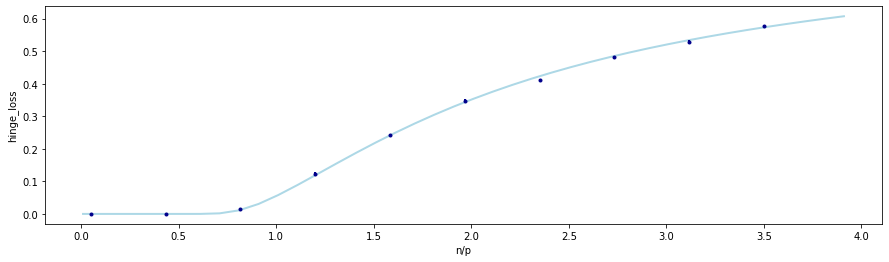

In [15]:
theo = pd.read_csv(path_to_res_folder +'/res_%s_single_gaussian.csv'%(loss), delimiter = ',')
sim = pd.read_csv(path_to_res_folder +'/sim_%s_single_gaussian.csv'%(loss), delimiter = ',')
fig, ax = plt.subplots(1, figsize=(15,4), sharex = True, sharey=False)

theo[(theo["cov_identifier"] == cov_identifier) & (theo["lamb"] == λ)].plot(x='alpha',
         y='train_loss',
         color = 'lightblue',
         lw = 2,
         linestyle='-',
         ax=ax,
         label='theory')

sim[(sim["cov_identifier"] == cov_identifier) & (sim["lamb"] == λ)].plot(x='alpha',
        y='mean_train_loss',
        yerr = 'std_train_loss',        
        color = 'darkblue',
        marker = 'o',
        markersize = 3,                                                                         
        lw = 2,
        linestyle='None',
        ax=ax,
        label='simulation')

ax.set_ylabel(r"%s"%(loss))
ax.get_legend().remove()
ax.set_xlabel(r"n/p")

## Learning Curves with Gaussian Mixture
 
This section provides the guidelines to generate the learning curves relative to input data-points, drawn from a Gaussian distribution as:

$$\vec{x}_i \sim \rho_p \mathcal{N}\left(\vec{\mu}_p, \Sigma_p \right) + \rho_m \mathcal{N}\left(\vec{\mu}_m, \Sigma_m \right)$$

with $\vec{\mu}_{p/m}$ being the means and $\Sigma_{p/m}$ the covariance matrices of the two Gaussian clouds respectively. As for the previous two dataset type cases, the first step consists in selecting the mean and the covariance matrix of the Gaussian distribution. We use the method ***build-covariances_synthetic_gaussian_mixture*** for that. The type of mean and covariance matrix can be chosen through the strings *which_mean* and *which_cov*. The available implementations are *zero_mean* and *opposite_on_x_axis* for the mean and *both_diagonal* and *diagonal_three_blocks_gm* for the covariance matrix.

In [17]:
import numpy as np
from Simulations.get_covariances import build_covariances_synthetic_gaussian_mixture
from Theory.gaussian_mixture import get_gaussian_mixture_learning_curve

In [18]:
p = 1000
which_synthetic_dataset = "gaussian_mixture"
which_cov = "both_diagonal"
which_mean = "opposite_on_x_axis"
ρ_p = 0.5
ρ_m = 0.5

μ_p, μ_m, Σp, Σm = build_covariances_synthetic_gaussian_mixture(p = p,  
                  which_cov = which_cov, which_mean = which_mean,
                  ρ_p = ρ_p, ρ_m = ρ_m)

Having determined the mean and the covariance matrix of the Gaussian distribution, we can then get the theoretical predictions on the training loss as a function of the number of samples per input dimension. The method ***get_gaussian_mixture_learning_curve*** implements the saddle-point equations for the chosen classification problem. The results are collected in a csv format file.

In [19]:
loss = "hinge_loss"
path_to_res_folder = "./results"
resfile = "res_%s_gaussian_mixture.csv"%(loss)
αs = np.arange(0.01, 4., 0.1)
max_iters = 1
ϵ = 1e-7
ψ = 0.0
λ = 0.1
mean_identifier = which_mean
cov_identifier = which_cov


get_gaussian_mixture_learning_curve(μ_p, Σp, μ_m, Σm, mean_identifier, cov_identifier, αs=αs, λ=λ, 
                                    loss = loss, ψ=ψ, ρ_p=ρ_p, ρ_m=ρ_m,
                                    path_to_res_folder = path_to_res_folder, resfile = resfile, 
                                    max_iters = max_iters, ϵ = ϵ)

-----------------------> processing n/p =  0.01
-----------------------> processing n/p =  0.11
-----------------------> processing n/p =  0.21000000000000002
-----------------------> processing n/p =  0.31000000000000005
-----------------------> processing n/p =  0.41000000000000003
-----------------------> processing n/p =  0.51
-----------------------> processing n/p =  0.6100000000000001
-----------------------> processing n/p =  0.7100000000000001
-----------------------> processing n/p =  0.81
-----------------------> processing n/p =  0.91
-----------------------> processing n/p =  1.01
-----------------------> processing n/p =  1.11
-----------------------> processing n/p =  1.2100000000000002
-----------------------> processing n/p =  1.31
-----------------------> processing n/p =  1.4100000000000001
-----------------------> processing n/p =  1.51
-----------------------> processing n/p =  1.61
-----------------------> processing n/p =  1.7100000000000002
---------------------

Once we get the theoretical predictions, the method ***get_learning_curve_synthetic*** evaluates the training loss as a function of the number of samples per input dimension. The results are collected in a csv file, one for each seed.

In [20]:
n_seeds = 10
solver = 'sk'
αs = np.linspace(0.05,3.5, 10)
for seed in range(n_seeds):
    print("processing seed n. ", seed)
    get_learning_curve_synthetic(p, None, None, μ_p, Σp, μ_m, Σm, αs = αs, λ = λ, loss = loss, 
                                 which_synthetic_dataset = which_synthetic_dataset,
                                 mean_identifier = mean_identifier, cov_identifier = cov_identifier,
                                 path_to_res_folder = path_to_res_folder, solver = solver, seed = seed)

processing seed n.  0
-----------------------> processing n/p =  0.05
-----------------------> processing n/p =  0.43333333333333335
-----------------------> processing n/p =  0.8166666666666668
-----------------------> processing n/p =  1.2000000000000002
-----------------------> processing n/p =  1.5833333333333335
-----------------------> processing n/p =  1.9666666666666668
-----------------------> processing n/p =  2.35
-----------------------> processing n/p =  2.7333333333333334
-----------------------> processing n/p =  3.1166666666666667
-----------------------> processing n/p =  3.5
processing seed n.  1
-----------------------> processing n/p =  0.05
-----------------------> processing n/p =  0.43333333333333335
-----------------------> processing n/p =  0.8166666666666668
-----------------------> processing n/p =  1.2000000000000002
-----------------------> processing n/p =  1.5833333333333335
-----------------------> processing n/p =  1.9666666666666668
-------------------

As a last step, we average the simulations over the specified number of seeds and we then plot the final results.

In [21]:
statistics_learning_curve_synthetic(n_seeds = n_seeds, loss = loss, which_synthetic_dataset = which_synthetic_dataset, path_to_res_folder = path_to_res_folder)

Text(0.5, 0, 'n/p')

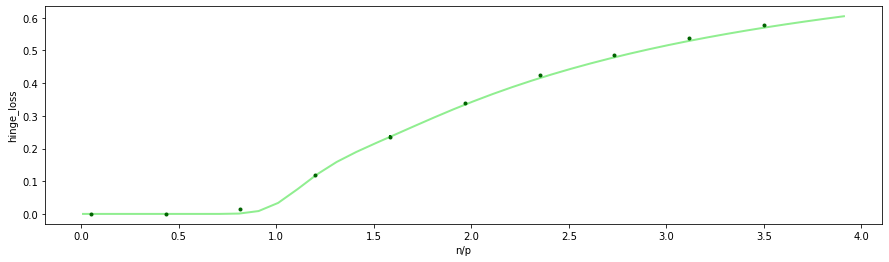

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
theo = pd.read_csv(path_to_res_folder + '/res_%s_gaussian_mixture.csv'%(loss), delimiter = ',')
sim = pd.read_csv(path_to_res_folder + '/sim_%s_gaussian_mixture.csv'%(loss), delimiter = ',')
fig, ax = plt.subplots(1, figsize=(15,4), sharex = True, sharey=False)

theo[(theo["cov_identifier"] == cov_identifier) & (theo["lamb"] == λ)].plot(x='alpha',
         y='train_loss',
         color = 'lightgreen',
         lw = 2,
         linestyle='-',
         ax=ax,
         label='theory')

sim[(sim["cov_identifier"] == cov_identifier) & (sim["lamb"] == λ)].plot(x='alpha',
        y='mean_train_loss',
        yerr = 'std_train_loss',        
        color = 'darkgreen',
        marker = 'o',
        markersize = 3,                                                                         
        lw = 2,
        linestyle='None',
        ax=ax,
        label='simulation')

ax.set_ylabel(r"%s"%(loss))
ax.get_legend().remove()
ax.set_xlabel(r"n/p")